In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<center> <img src="https://blog-assets.freshworks.com/freshdesk/wp-content/uploads/2020/06/18152022/Blog_Banner_v1-01-1024x410.jpg"> </center>

### About Dataset

#### Context

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


#### Content

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

#### Target

Need to perform clustering to summarize customer segments.

In [9]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign1.csv to marketing_campaign1.csv


In [11]:
# Reading and making a copy of the dataset

main_df = pd.read_csv("marketing_campaign1.csv", sep="\t")
df = main_df.copy()
df.head()

,"cust_ID,Year_Birth,Education,Marital_Status,Income,Kid_home,Teen_home,Dt_Customer,Recency,Mnt_Wines,Mnt_Fruits,Mnt_Meat_Products,Mnt_Fish_Products,Mnt_Sweet_Products,Mnt_Gold_Prods,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_WebVisits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Z_CostContact,Z_Revenue,Response"
0,"5524,1957,Graduation,Single,58138,0,0,41156,58..."
1,"2174,1954,Graduation,Single,46344,1,1,41706,38..."
2,"4141,1965,Graduation,Together,71613,0,0,41507,..."
3,"6182,1984,Graduation,Together,26646,1,0,41680,..."
4,"5324,1981,PhD,Married,58293,1,0,41658,94,173,4..."


### EDA

In [12]:
# Checking the shape of the dataset

df.shape

(2240, 1)

In [13]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   cust_ID,Year_Birth,Education,Marital_Status,I

* Here we have only 3 object type datatype and rest are numerical.

In [14]:
# Finding the number of unique values present in each column

df.nunique()

,0
"cust_ID,Year_Birth,Education,Marital_Status,Income,Kid_home,Teen_home,Dt_Customer,Recency,Mnt_Wines,Mnt_Fruits,Mnt_Meat_Products,Mnt_Fish_Products,Mnt_Sweet_Products,Mnt_Gold_Prods,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_WebVisits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Z_CostContact,Z_Revenue,Response",2240


**NOTE**
* In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them.  

In [15]:
# Checking if any NaN is present in column or not

df.isna().any()

,0
"cust_ID,Year_Birth,Education,Marital_Status,Income,Kid_home,Teen_home,Dt_Customer,Recency,Mnt_Wines,Mnt_Fruits,Mnt_Meat_Products,Mnt_Fish_Products,Mnt_Sweet_Products,Mnt_Gold_Prods,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_WebVisits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Z_CostContact,Z_Revenue,Response",False


* Income column have some missing value in it so we will need to fill it by by either mean or median.

<Axes: >

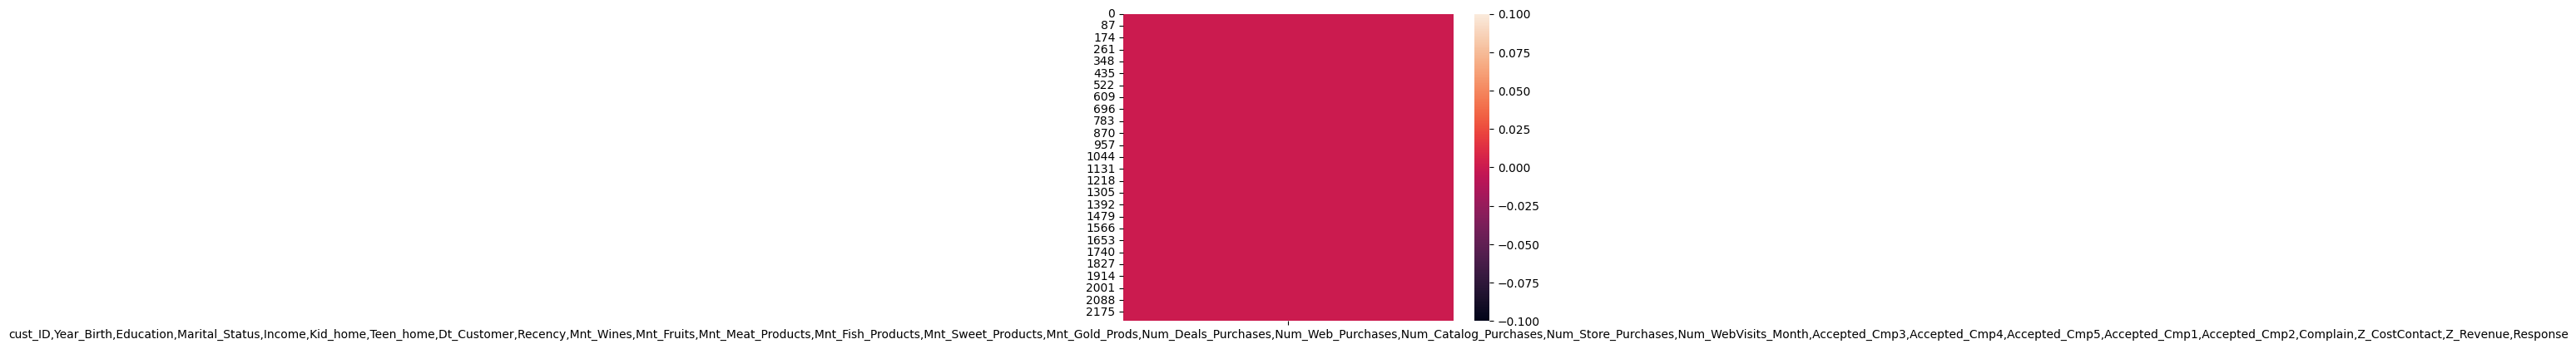

In [16]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [21]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")


In [24]:
print(df.columns.tolist())



['cust_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_webvisits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response']


In [ ]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
df = df.drop(columns=["Z_CostContact", "Z_Revenue"], errors="ignore")


In [28]:
df = pd.read_csv("marketing_campaign1.csv", delimiter=",", engine="python")


In [29]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cust_ID                2240 non-null   int64 
 1   Year_Birth             2240 non-null   int64 
 2   Education              2240 non-null   object
 3   Marital_Status         2240 non-null   object
 4   Income                 2240 non-null   int64 
 5   Kid_home               2240 non-null   int64 
 6   Teen_home              2240 non-null   int64 
 7   Dt_Customer            2240 non-null   int64 
 8   Recency                2240 non-null   int64 
 9   Mnt_Wines              2240 non-null   int64 
 10  Mnt_Fruits             2240 non-null   int64 
 11  Mnt_Meat_Products      2240 non-null   int64 
 12  Mnt_Fish_Products      2240 non-null   int64 
 13  Mnt_Sweet_Products     2240 non-null   int64 
 14  Mnt_Gold_Prods         2240 non-null   int64 
 15  Num_Deals_Purchases  

* No two columns are too much correlated with each other so we can't drop any column on the basis of correlation.

In [31]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()


In [32]:
c1 = corr.abs().unstack()
c1.sort_values(ascending=False)[24:50:2]


,,0
cust_ID,cust_ID,1.000000
Mnt_Meat_Products,Num_Catalog_Purchases,0.723827
Mnt_Wines,Num_Store_Purchases,0.642100
Num_Catalog_Purchases,Mnt_Wines,0.635226
Mnt_Fruits,Mnt_Fish_Products,0.594804
Num_Catalog_Purchases,Income,0.586144
Mnt_Sweet_Products,Mnt_Fish_Products,0.579870
Income,Mnt_Wines,0.575278
Mnt_Meat_Products,Income,0.574454
Mnt_Fish_Products,Mnt_Meat_Products,0.568402


* It is used to calculate how one variable is correlated/ dependent on other variable.
* Extreme values signify high correlation.
* Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

### Preprocessing of the dataset

In [33]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

,0
cust_ID,False
Year_Birth,False
Education,False
Marital_Status,False
Income,False
Kid_home,False
Teen_home,False
Dt_Customer,False
Recency,False
Mnt_Wines,False


In [34]:
df.head()

,cust_ID,Year_Birth,Education,Marital_Status,Income,Kid_home,Teen_home,Dt_Customer,Recency,Mnt_Wines,...,Num_WebVisits_Month,Accepted_Cmp3,Accepted_Cmp4,Accepted_Cmp5,Accepted_Cmp1,Accepted_Cmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,41156,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,41706,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,41507,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,41680,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,41658,94,173,...,5,0,0,0,0,0,0,3,11,0


In [35]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [36]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

* In the above cell we are grouping 'Married', 'Together' as "relationship"
* Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

In [37]:
# Count of different values present in Marital_Status

df['Marital_Status'].value_counts()

,count
Marital_Status,
relationship,1444
Single,796


In [39]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kid_home'] + df['Teen_home']
df['Expenses'] = df['Mnt_Wines'] + df['Mnt_Fruits'] + df['Mnt_Meat_Products'] + df['Mnt_Fish_Products'] + df['Mnt_Sweet_Products'] + df['Mnt_Gold_Prods']
df['Total_Accepted_Cmp'] = df['Accepted_Cmp1'] + df['Accepted_Cmp2'] + df['Accepted_Cmp3'] + df['Accepted_Cmp4'] + df['Accepted_Cmp5'] + df['Response']
df['Num_Total_Purchases'] = df['Num_Web_Purchases'] + df['Num_Catalog_Purchases'] + df['Num_Store_Purchases'] + df['Num_Deals_Purchases']

In [44]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Accepted_Cmp1" , "Accepted_Cmp2", "Accepted_Cmp3" , "Accepted_Cmp4","Accepted_Cmp5", "Response","Num_WebVisits_Month", "Num_Web_Purchases","Num_Catalog_Purchases","Num_Store_Purchases","Num_Deals_Purchases" , "Kid_home", "Teen_home","Mnt_Wines", "Mnt_Fruits", "Mnt_Meat_Products", "Mnt_Fish_Products", "Mnt_Sweet_Products", "Mnt_Gold_Prods"]
df=df.drop(columns=col_del,axis=1)
df.head()

,cust_ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Kids,Expenses,Total_Accepted_Cmp,Num_Total_Purchases
0,5524,1957,Graduation,Single,58138,41156,58,0,3,11,0,1617,1,25
1,2174,1954,Graduation,Single,46344,41706,38,0,3,11,2,27,0,6
2,4141,1965,Graduation,relationship,71613,41507,26,0,3,11,0,776,0,21
3,6182,1984,Graduation,relationship,26646,41680,26,0,3,11,1,53,0,8
4,5324,1981,PhD,relationship,58293,41658,94,0,3,11,1,422,0,19


In [45]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

In [46]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [47]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [48]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [50]:
df=df.drop(columns=["cust_ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 11)

### Visualization

In [51]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()

In [52]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

**Less number of single customer**

In [53]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [54]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [57]:
import plotly.express as px

fig = px.histogram(
    df,
    x="Num_Total_Purchases",     # Corrected column name
    facet_row="Education",
    template='plotly_dark'
)
fig.show()



In [58]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [59]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [60]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

**35% of the customer are single whereas more 64% are in relationship.**

In [61]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "plotly_dark")
fig.show ()

** More than 97% customer are from PG background. and Approx. 2% are from UG.

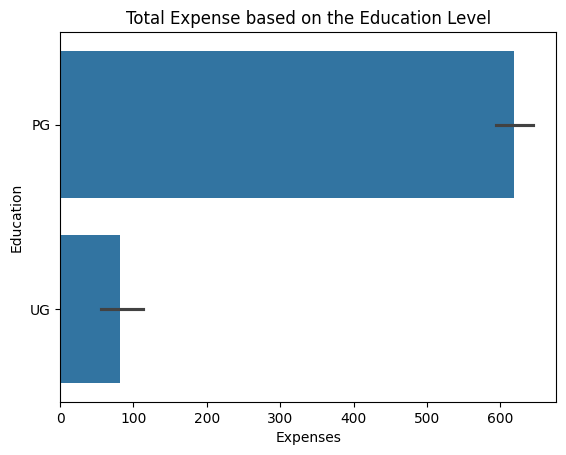

In [62]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');

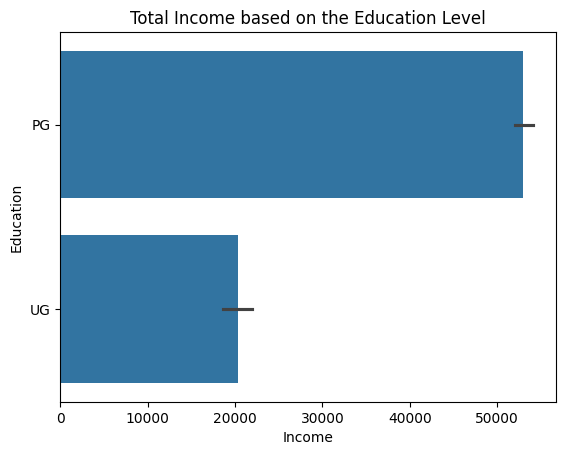

In [63]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');

In [64]:
df.describe()

,Income,Z_CostContact,Z_Revenue,Kids,Expenses,Total_Accepted_Cmp,Num_Total_Purchases,Age,day_engaged
count,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
mean,52208.082143,3.0,11.0,0.950446,605.798214,0.446875,14.862054,46.194196,16435.0
std,25189.841578,0.0,0.0,0.751803,602.249288,0.890543,7.677173,11.984069,0.0
min,1730.000000,3.0,11.0,0.000000,5.000000,0.000000,0.000000,19.000000,16435.0
25%,34980.000000,3.0,11.0,0.000000,68.750000,0.000000,8.000000,38.000000,16435.0
50%,51371.000000,3.0,11.0,1.000000,396.000000,0.000000,15.000000,45.000000,16435.0
75%,68522.000000,3.0,11.0,1.000000,1045.500000,1.000000,21.000000,56.000000,16435.0
max,666666.000000,3.0,11.0,3.000000,2525.000000,5.000000,44.000000,122.000000,16435.0


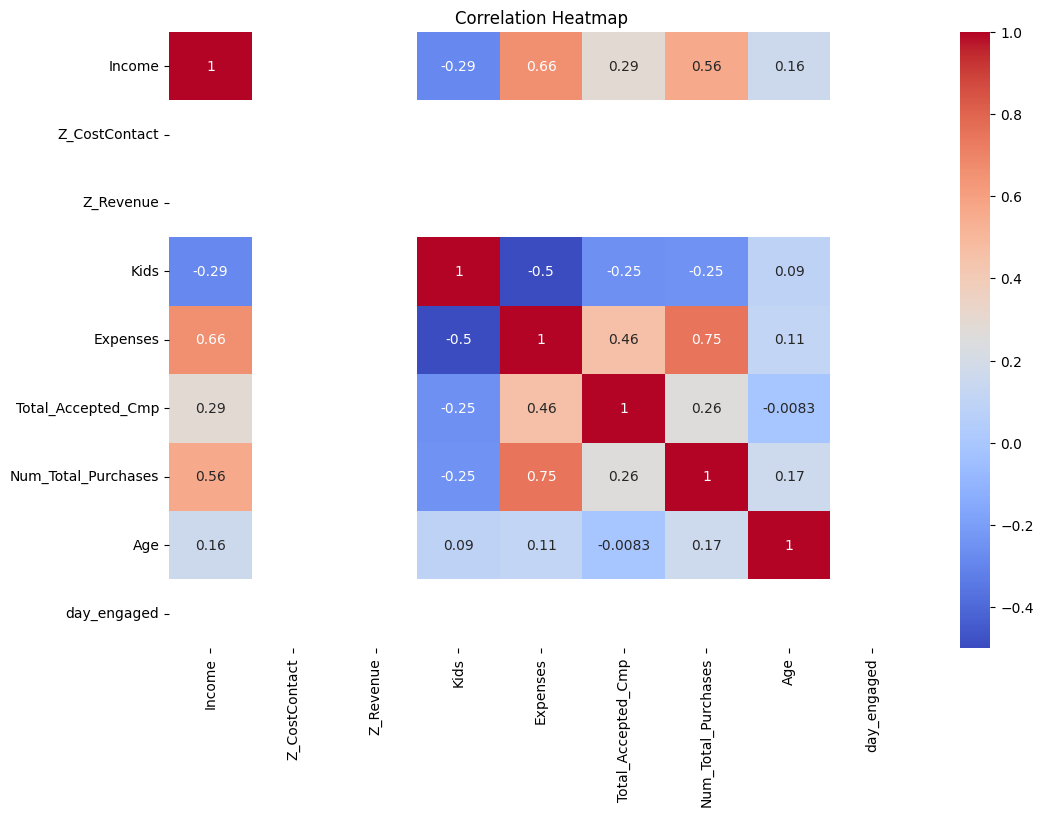

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [69]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [71]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
relationship,1444
Single,796


### Label Encoding

In [72]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [73]:
df1 = df.copy()

### Standardization

In [74]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [75]:
scaled_features_df.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Kids,Expenses,Total_Accepted_Cmp,Num_Total_Purchases,Age,day_engaged
0,-0.157171,-1.346874,0.235462,0.0,0.0,-1.264505,1.679417,0.621248,1.320826,0.985345,0.0
1,-0.157171,-1.346874,-0.232847,0.0,0.0,1.396361,-0.961275,-0.501912,-1.154596,1.235733,0.0
2,-0.157171,0.742460,0.770519,0.0,0.0,-1.264505,0.282673,-0.501912,0.799685,0.317643,0.0
3,-0.157171,0.742460,-1.015004,0.0,0.0,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,0.0
4,-0.157171,0.742460,0.241616,0.0,0.0,0.065928,-0.305254,-0.501912,0.539114,-1.017761,0.0


### Elbow Method

In [76]:
from sklearn.cluster import KMeans

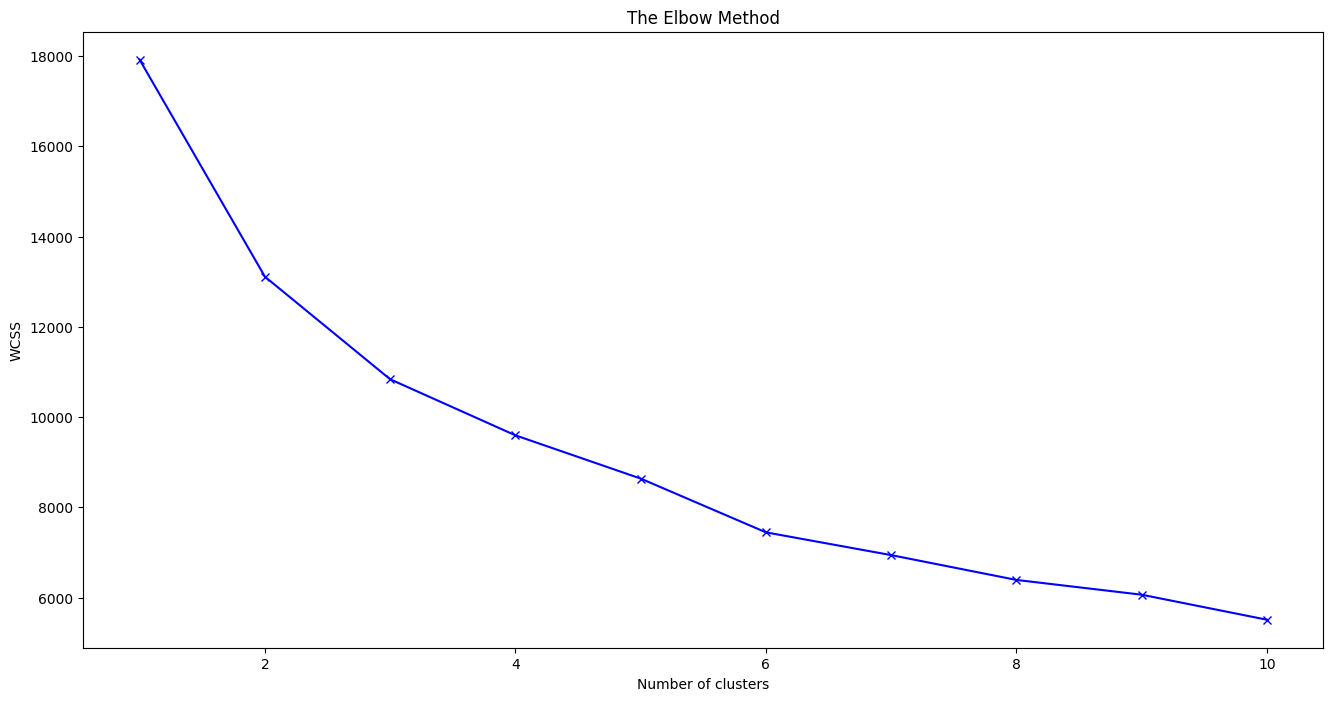

In [77]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**As it is not very clear from the elbow method that which value of K to choose.**

### Silhouette Score

In [78]:
from sklearn.metrics import silhouette_score

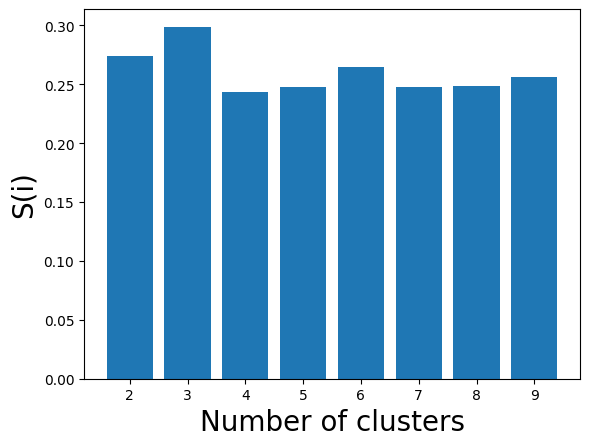

In [79]:

silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

**Here we are using Silhouette score to measure the value of K**

In [80]:
silhouette_scores

[np.float64(0.2741187917056407),
 np.float64(0.2988760510247453),
 np.float64(0.2432044594246872),
 np.float64(0.24748094823635947),
 np.float64(0.26501545686889655),
 np.float64(0.2479915352113974),
 np.float64(0.2489054027639786),
 np.float64(0.25599014793168323)]

In [81]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


### Model Building

In [82]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

In [83]:
df.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Kids,Expenses,Total_Accepted_Cmp,Num_Total_Purchases,Age,day_engaged,cluster
0,0,0,58138,3,11,0,1617,1,25,58,16435,2
1,0,0,46344,3,11,2,27,0,6,61,16435,1
2,0,1,71613,3,11,0,776,0,21,50,16435,2
3,0,1,26646,3,11,1,53,0,8,31,16435,1
4,0,1,58293,3,11,1,422,0,19,34,16435,1


In [84]:
scaled_features_df.head()

,Education,Marital_Status,Income,Z_CostContact,Z_Revenue,Kids,Expenses,Total_Accepted_Cmp,Num_Total_Purchases,Age,day_engaged
0,-0.157171,-1.346874,0.235462,0.0,0.0,-1.264505,1.679417,0.621248,1.320826,0.985345,0.0
1,-0.157171,-1.346874,-0.232847,0.0,0.0,1.396361,-0.961275,-0.501912,-1.154596,1.235733,0.0
2,-0.157171,0.742460,0.770519,0.0,0.0,-1.264505,0.282673,-0.501912,0.799685,0.317643,0.0
3,-0.157171,0.742460,-1.015004,0.0,0.0,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,0.0
4,-0.157171,0.742460,0.241616,0.0,0.0,0.065928,-0.305254,-0.501912,0.539114,-1.017761,0.0


In [85]:
df['Education'].value_counts()

,count
Education,
0,2186
1,54


* 0 means PG and 1 means UG
* There are very less customer from UG background

### Clustering

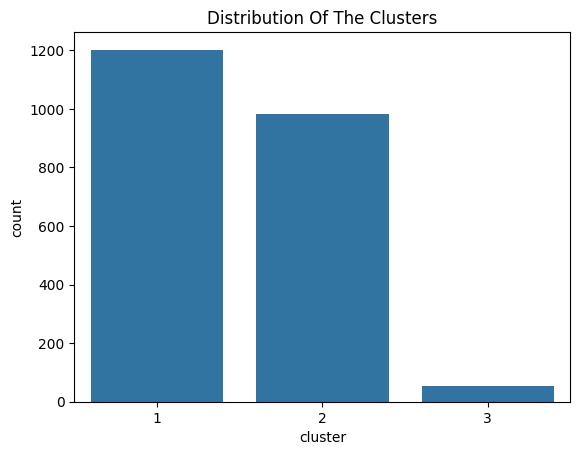

In [86]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**Note :-**

**As we can see here that weightage of customer are more in cluster 1 as compare to other.**

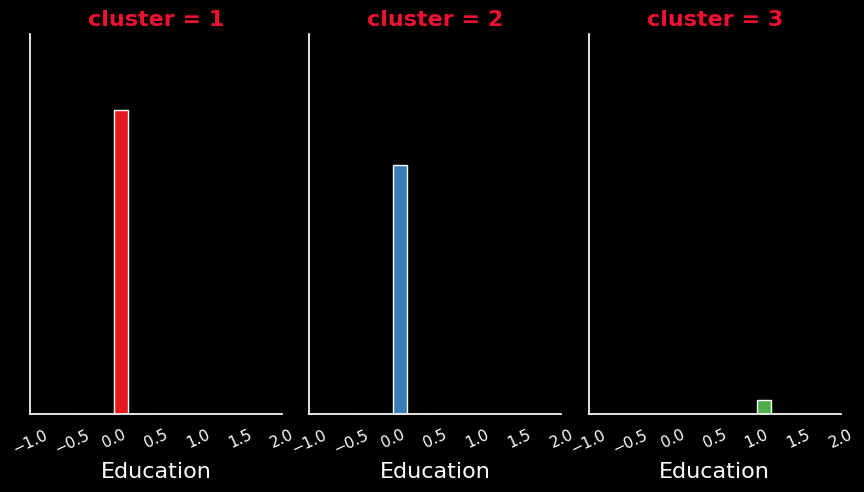

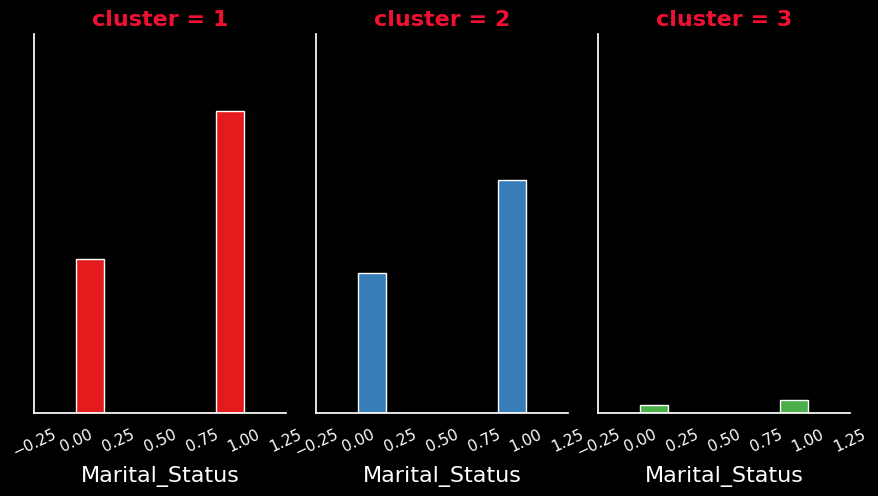

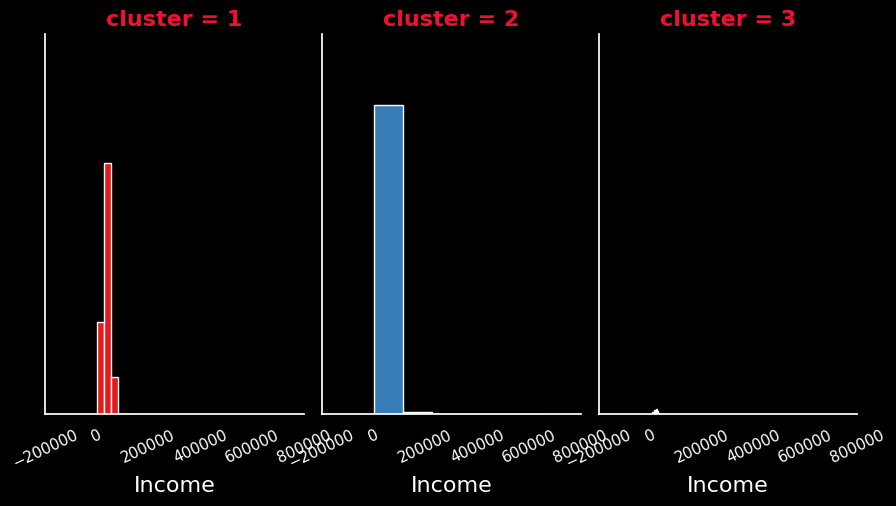

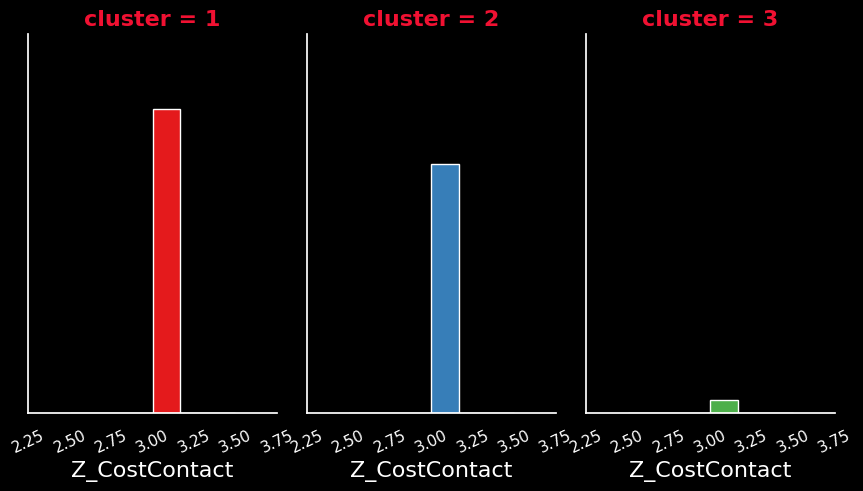

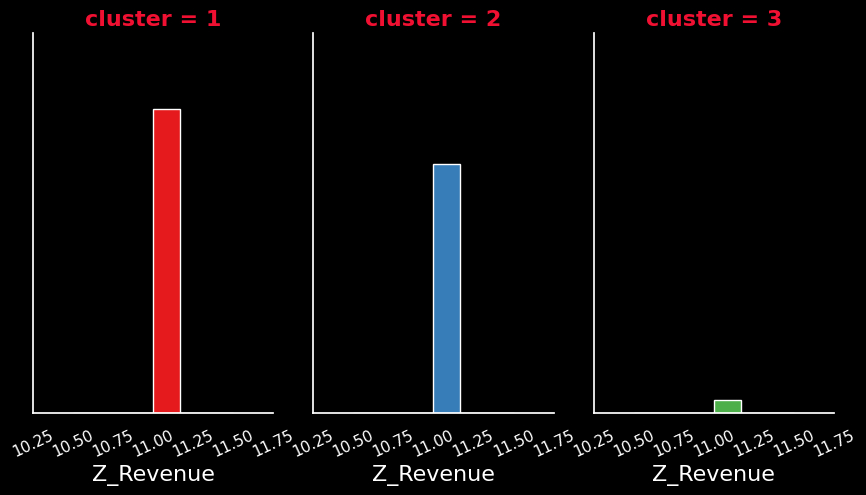

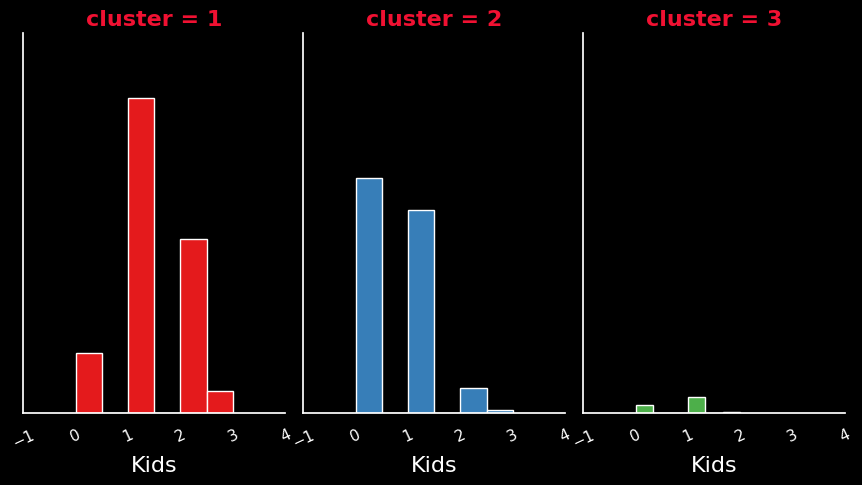

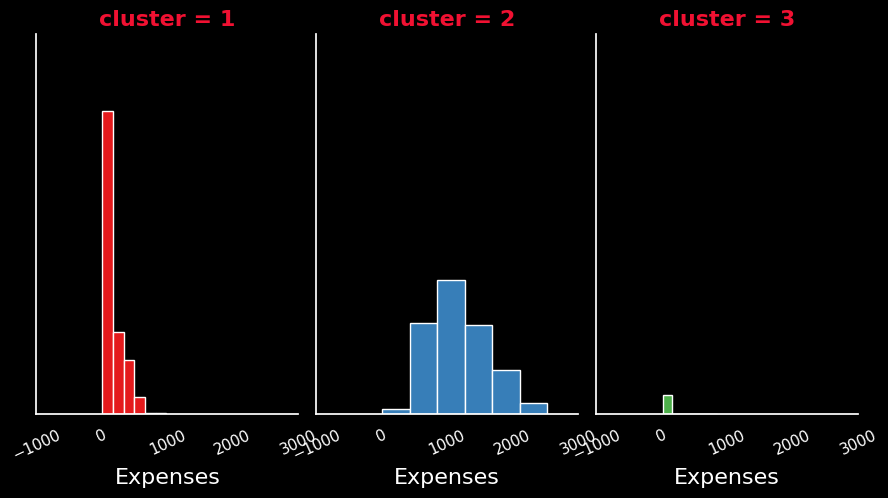

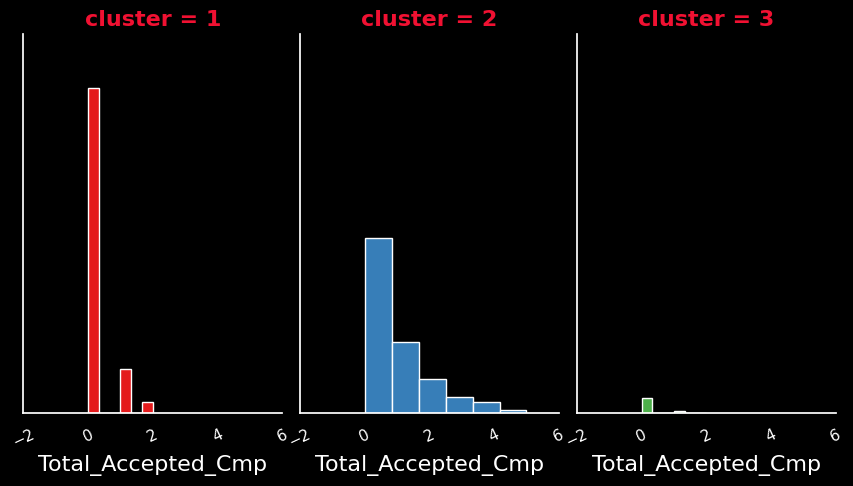

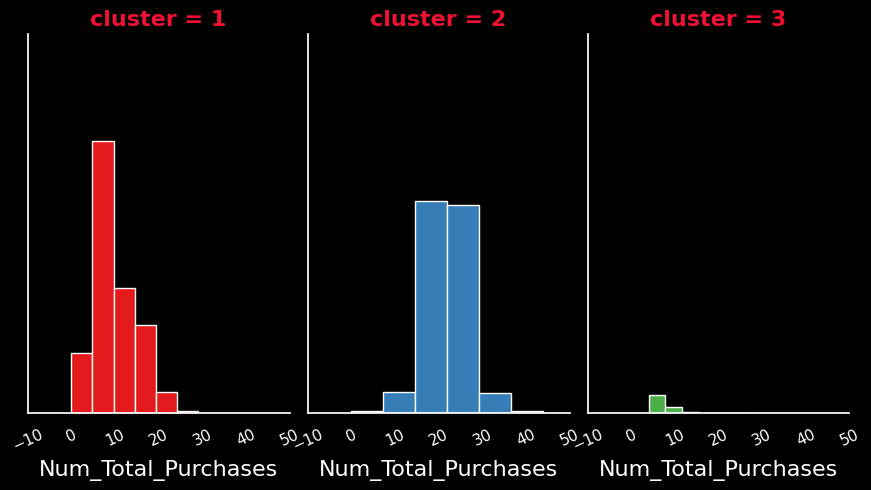

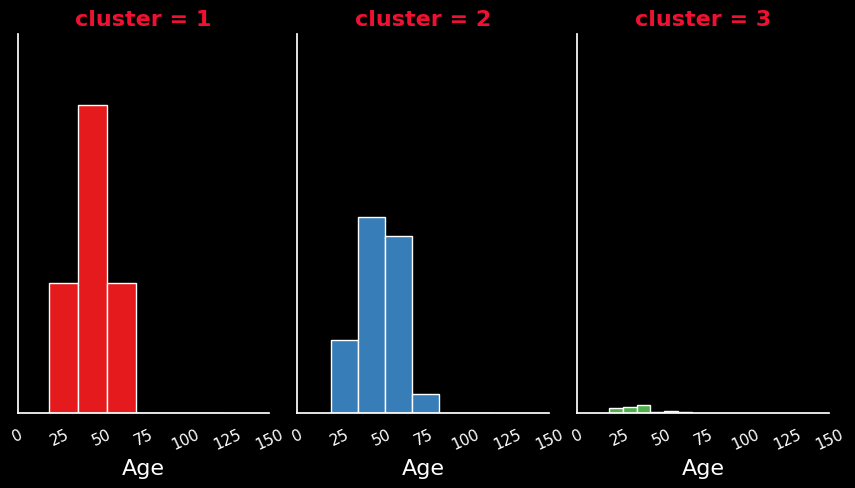

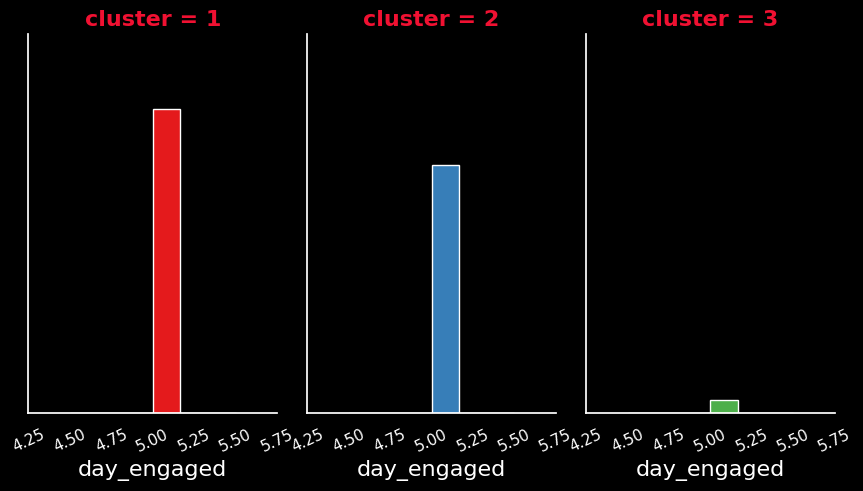

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the visual style
sns.set(rc={
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.grid': False,
    'font.family': 'Ubuntu'
})

# Select only numeric columns (excluding cluster label if needed)
numeric_cols = df.select_dtypes(include='number').drop(columns=['cluster'], errors='ignore').columns

# Loop through each numeric column
for col in numeric_cols:
    diag = sns.FacetGrid(df, col="cluster", hue="cluster", palette="Set1")
    diag.map(plt.hist, col, bins=6, ec="k")
    diag.set_xticklabels(rotation=25, color='white')
    diag.set_yticklabels(color='white')
    diag.set_xlabels(size=16, color='white')
    diag.set_titles(size=16, color='#f01132', fontweight="bold")
    diag.fig.set_figheight(6)
    plt.show()


### Report

#### Based on above information we can divide customer into 3 parts:-

1. **Highly Active Customer** :- These customers belong to cluster one.
2. **Moderately Active Customer** :- These customers belong to cluster two.
3. **Least Active Customer** :-  These customers belong to cluster third.

#### Characteristics of Highly Active Customer

- **In terms of Education**
 - Highly Active Customer are from PG background


- **In terms of Marital_status**
 - Number of people in relationship are approx. two times of single people


- **In terms of Income**
 - Income of Highly active customer are little less as compare to Moderately active customer.


- **In terms of Kids**
 - Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).


- **In terms of Expenses**
 - Expenses of Highly Active customer are less as compare to moderate.
 - These customer spent avg. of approx. 100-200 unit money.


- **In terms of Age**
 - Age of these customer are between 25 to 75.
 - Maximum customer age are between 40 to 50.


- **In terms of day_engaged**
 - Highly Active customer are more loyal as they engaged with company for longer period of time.

#### Characteristics of Moderately Active Customer

- **In terms of Education**
 - Moderately Active Customer are also from PG backgroud


- **In terms of Marital_status**
 - Number of people in relationship are slightly more as compare to single people


- **In terms of Income**
 - Income of Moderately active customer are higher as compare to other customer.


- **In terms of Kids**
 - Moderately active customer have less number of childern as compare to highly active customer ( Max. customer has no child ).


- **In terms of Expenses**
 - Expenses of Moderately Active customer are more as compare to Active.
 - These customer spent avg. of approx. 500-2000 unit money.


- **In terms of Age**
 - Age of these customer are between 25 to 75.
 - Maximum customer age are between 35 to 60.


- **In terms of day_engaged**
 - Moderately Active customer are slightly less engaged with company as compare to Highly Active Customer.


#### Characteristics of Least Active Customer

- **In terms of Education**
 - Least Active Customer are from UG backgroud

    
- **In terms of Marital_status**
 - Number of people in relationship are approx. equal to single people

- **In terms of Income**
 - Income of Least active customer are very less or say negligible.
    
- **In terms of Kids**
 - Only few of these customer have child.

- **In terms of Expenses**
 - Expenses of Least Active customer are very less or say negligible.


- **In terms of Age**
 - Age of these customer are between 15 to 30.


- **In terms of day_engaged**
 - Least Active customer are not much enrolled with company for longer time.

**Please like this notebook👍, If it helped you in learning something new🙂 and do check my other notebook.**